In [127]:
%run "part02_preprocessing.ipynb"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   gender                381109 non-null  object 
 2   age                   381109 non-null  int64  
 3   region_code           381109 non-null  float64
 4   policy_sales_channel  381109 non-null  float64
 5   id.1                  381109 non-null  int64  
 6   driving_license       381109 non-null  int64  
 7   vehicle_age           381109 non-null  object 
 8   vehicle_damage        381109 non-null  object 
 9   id.2                  381109 non-null  int64  
 10  previously_insured    381109 non-null  int64  
 11  annual_premium        381109 non-null  float64
 12  vintage               381109 non-null  int64  
 13  response              381109 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 43.

# <div style="color:white;display:fill;border-radius:5px;background-color:#0E2031;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Content</p></div>     
     
**Settings**

**Exploratoty Data Analysis**  
- Analise Univariada
- Analise Bivariada
- Analise Multivariada

## <div style="color:white;display:fill;border-radius:5px;background-color:#153656;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Settings</p></div>

In [128]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [129]:
data_new=data.copy()

In [130]:
numerical_features = data.select_dtypes(include = 'number').columns.values
categorical_features = data_new.select_dtypes(include = 'object').columns.values

In [131]:
print(numerical_features)
print(categorical_features)

['id' 'age' 'region_code' 'policy_sales_channel' 'driving_license'
 'previously_insured' 'annual_premium' 'vintage' 'response']
['gender' 'vehicle_age' 'vehicle_damage']


In [132]:
def summary_stats(df):
    # central tendency: mean, median    
    df = df[numerical_features]
    
    count_ = pd.DataFrame(df.apply(np.size))
    pct_ = pd.DataFrame(df.apply(np.size)/len(data_new)*100)
    sum_ = pd.DataFrame(df.apply(np.sum))
    mean_ = pd.DataFrame(df.apply(np.mean))
    std_ = pd.DataFrame(df.apply(np.std))
    median_ = pd.DataFrame(df.apply(np.median))
    
    min_ = pd.DataFrame(df.apply(min))
    max_ = pd.DataFrame(df.apply(max))
    range_ = pd.DataFrame(df.apply(lambda x: x.max() - x.min()))
    q1_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,25)))
    q3_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,75)))
    
    #skewness_= pd.DataFrame(df.apply(lambda x: x.skew()))
    #kurtosis_ = pd.DataFrame(df.apply(lambda x: x.kurtosis()))
    
    summary = pd.concat([count_, pct_, mean_, std_, median_, sum_, min_, max_, range_, q1_,q3_],axis=1)
    summary.columns = ['counts', '%','mean','std','median','sum','min','max', 'range', '25%','75%']
 

    cm = sns.light_palette("#2D7DAB", as_cmap = True)
    
    display(summary.style.format('{:.2f}').background_gradient(subset=(summary.index[2:],summary.columns[:]),cmap=cm))

## <div style="color:white;display:fill;border-radius:5px;background-color:#153656;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Analise Univariada</p></div>

In [133]:
summary_stats(data_new)

,counts,%,mean,std,median,sum,min,max,range,25%,75%
id,381109.00,100.00,190555.00,110016.69,190555.00,72622225495.00,1.00,381109.00,381108.00,95278.00,285832.00
age,381109.00,100.00,38.82,15.51,36.00,14795636.00,20.00,85.00,65.00,25.00,49.00
region_code,381109.00,100.00,26.39,13.23,28.00,10057012.00,0.00,52.00,52.00,15.00,35.00
policy_sales_channel,381109.00,100.00,112.03,54.20,133.00,42697278.00,1.00,163.00,162.00,29.00,152.00
driving_license,381109.00,100.00,1.00,0.05,1.00,380297.00,0.00,1.00,1.00,1.00,1.00
previously_insured,381109.00,100.00,0.46,0.50,0.00,174628.00,0.00,1.00,1.00,0.00,1.00
annual_premium,381109.00,100.00,30564.39,17213.13,31669.00,11648363949.00,2630.00,540165.00,537535.00,24405.00,39400.00
vintage,381109.00,100.00,154.35,83.67,154.00,58823182.00,10.00,299.00,289.00,82.00,227.00
response,381109.00,100.00,0.12,0.33,0.00,46710.00,0.00,1.00,1.00,0.00,0.00


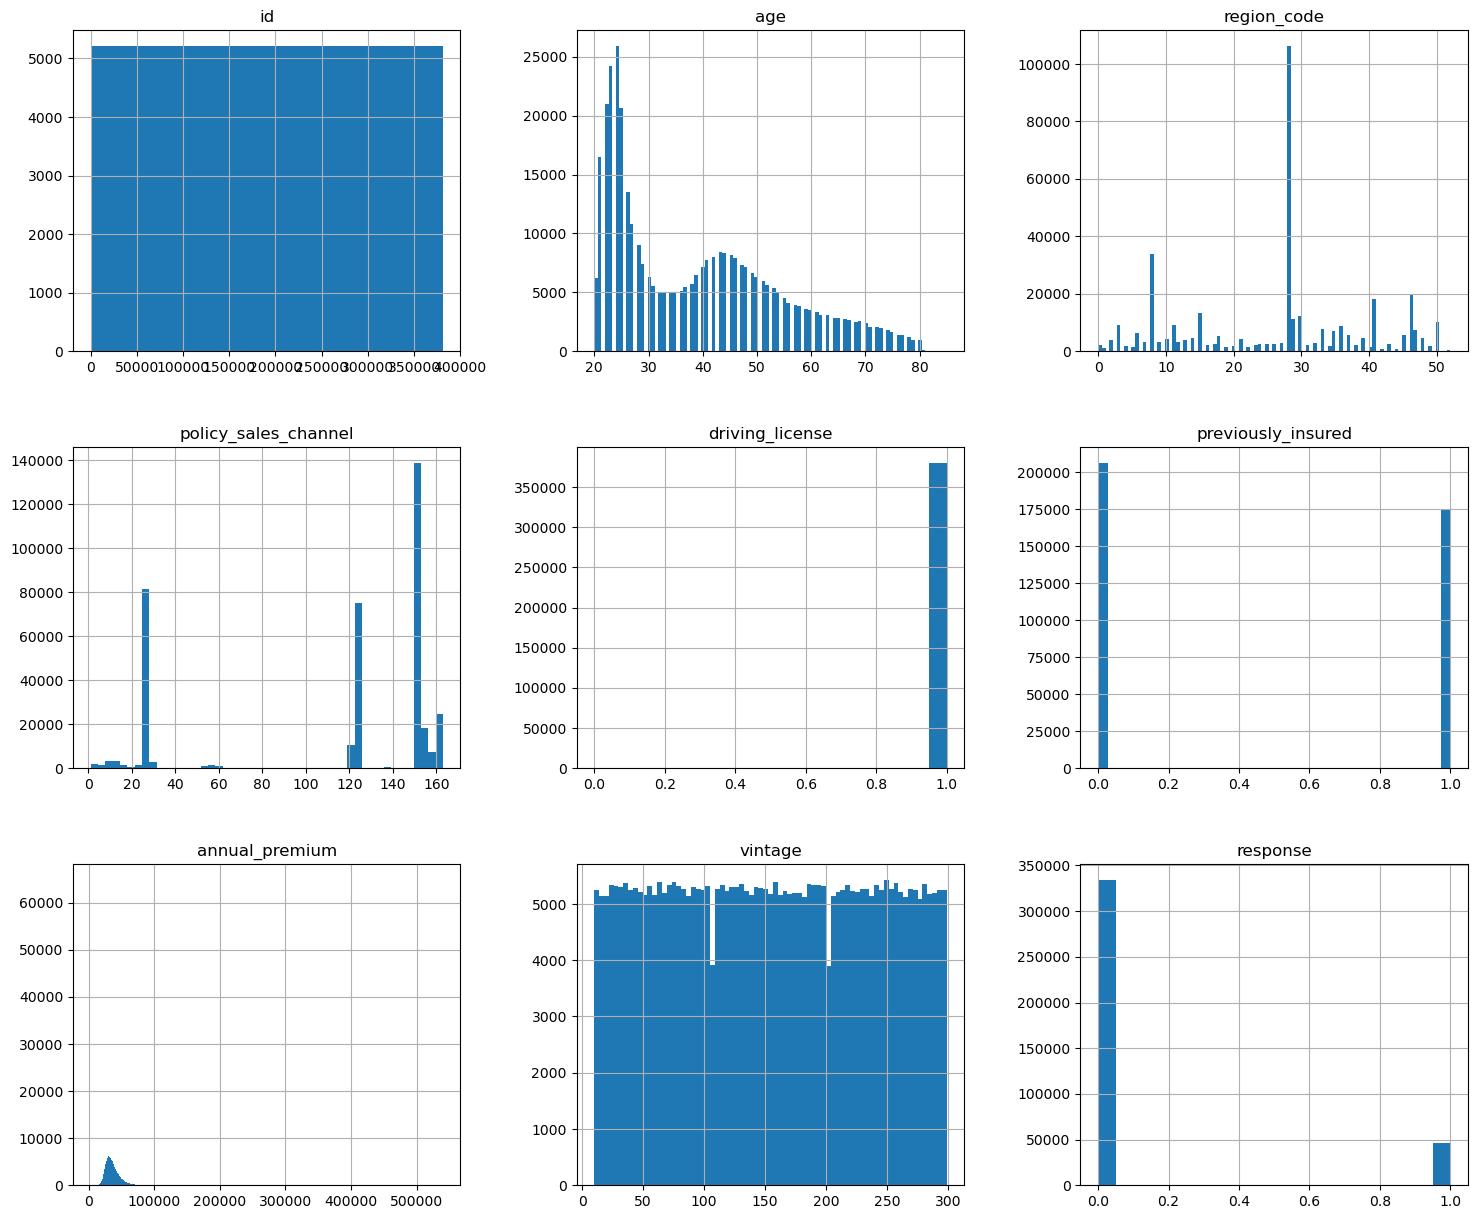

In [146]:
data_new[numerical_features].hist(figsize=(18,15), bins='auto');

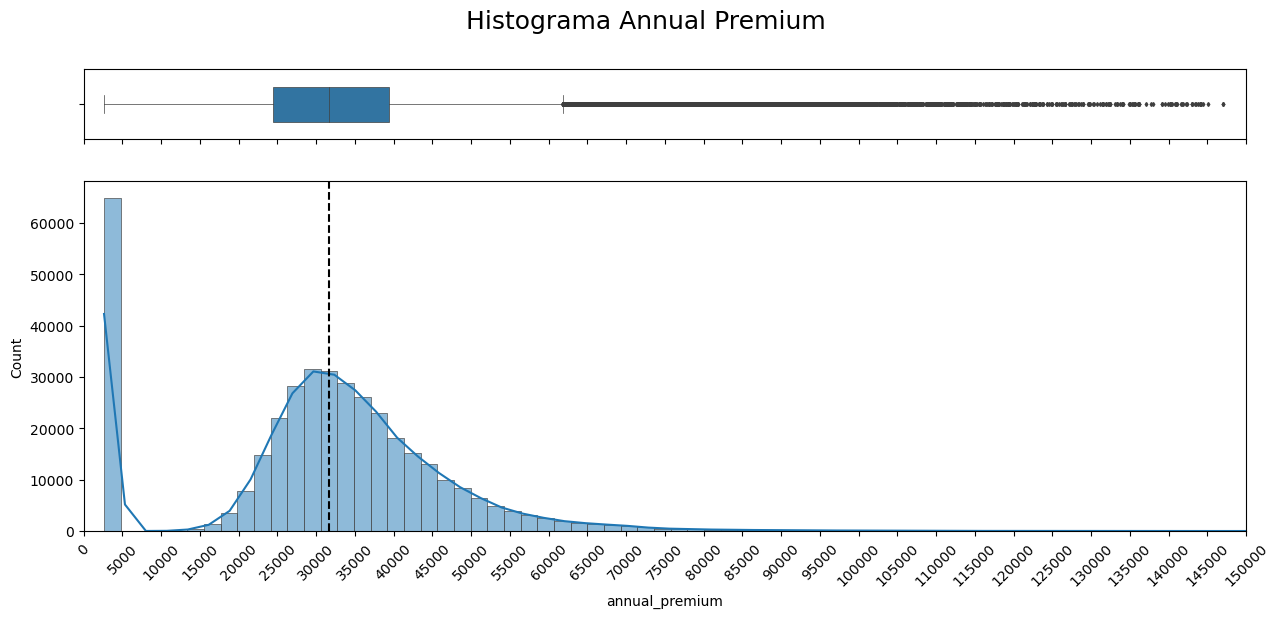

In [147]:
fig, (ax_box, ax_hist) = plt.subplots(2, figsize=(15,6), sharex=True, gridspec_kw = {"height_ratios": (0.2, 1)})
fig.suptitle('Histograma Annual Premium', fontsize=18)
sns.boxplot(x=data_new['annual_premium'], ax=ax_box, linewidth=.5, width=.5, fliersize=2)
ax_box.set(xlabel='')
sns.histplot(data=data_new['annual_premium'], ax=ax_hist, bins=250, kde=True, edgecolor=".3", linewidth=.5 )
ax_hist.axvline(data_new['annual_premium'].median(), color='black', ls='--')
plt.xticks(np.arange(0,155000,5000), rotation=45)
plt.xlim([0, 150000])
plt.show()

In [148]:
# plt.figure(figsize=(18,8))
# plt.suptitle('Sales by Store Type', fontsize=18)
# plt.subplot(1, 3, 1)
# sns.boxplot(data=data_new, x='gender', y='annual_premium')
# plt.subplot(1, 3, 2)
# sns.boxplot(data=data_new, x='vehicle_age', y='annual_premium')
# plt.subplot (1, 3, 3)
# sns.boxplot(data=data_new, x='vehicle_damage', y='annual_premium')

# sns.despine(left=False, bottom=False)

In [149]:
categorical_features

array(['gender', 'vehicle_age', 'vehicle_damage'], dtype=object)

In [155]:
print(data_new.gender.unique())
print(data_new.vehicle_age.unique())
print(data_new.vehicle_damage.unique())

['Male' 'Female']
['> 2 Years' '1-2 Year' '< 1 Year']
['Yes' 'No']


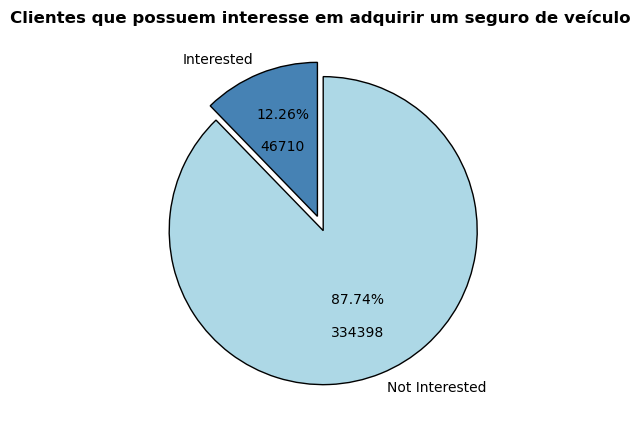

In [140]:
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.2f}%\n\n{:d}".format(pct, absolute) 

sizes = data_new['response'].value_counts().tolist()

plt.figure(figsize=(5,5))
plt.title('Clientes que possuem interesse em adquirir um seguro de veículo',fontsize=12, fontweight='bold');

plt.pie([len(data_new.loc[(data_new.response == 1)]), len(data_new.loc[(data_new.response == 0)]) ],            
        labels = ['Interested', 'Not Interested'],
        colors=['#4682B4','#ADD8E6'],
        explode = (0.05, 0.05),
        startangle=90,
        autopct = lambda pct: func(pct, sizes),
        #autopct='%.0f%%',
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black"}, textprops={'fontsize': 10});

In [84]:
summary_stats(data_new.loc[(data_new.annual_premium >= 10000)])

,counts,%,mean,std,median,sum,min,max,range,25%,75%
id,316227.00,82.98,190699.65,110015.97,190669.00,60304377491.00,1.00,381109.00,381108.00,95494.50,285975.50
age,316227.00,82.98,38.38,15.60,35.00,12136035.00,20.00,85.00,65.00,24.00,49.00
region_code,316227.00,82.98,26.41,12.90,28.00,8352928.00,0.00,52.00,52.00,15.00,35.00
policy_sales_channel,316227.00,82.98,111.65,53.94,124.00,35307223.00,1.00,163.00,162.00,26.00,152.00
driving_license,316227.00,82.98,1.00,0.05,1.00,315538.00,0.00,1.00,1.00,1.00,1.00
previously_insured,316227.00,82.98,0.48,0.50,0.00,151153.00,0.00,1.00,1.00,0.00,1.00
annual_premium,316227.00,82.98,36295.75,12811.53,33985.00,11477695324.00,10004.00,540165.00,530161.00,28488.00,41336.00
vintage,316227.00,82.98,154.26,83.68,154.00,48781714.00,10.00,299.00,289.00,82.00,227.00
response,316227.00,82.98,0.12,0.33,0.00,38204.00,0.00,1.00,1.00,0.00,0.00


In [145]:
data_new.loc[(data_new.annual_premium == 2630.0)].sort_values(by='annual_premium', ascending=True)

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
5,6,Female,24,33.0,160.0,1,< 1 Year,Yes,0,2630.0,176,0
252931,252932,Male,32,13.0,124.0,1,1-2 Year,Yes,0,2630.0,215,0
252932,252933,Female,31,35.0,152.0,1,< 1 Year,No,1,2630.0,272,0
252934,252935,Female,24,44.0,160.0,1,< 1 Year,No,1,2630.0,43,0
252949,252950,Male,32,46.0,124.0,1,< 1 Year,Yes,0,2630.0,198,0
...,...,...,...,...,...,...,...,...,...,...,...,...
125889,125890,Female,37,32.0,124.0,1,1-2 Year,No,1,2630.0,223,0
125894,125895,Female,26,36.0,152.0,1,< 1 Year,Yes,1,2630.0,84,0
125899,125900,Female,73,0.0,26.0,1,1-2 Year,No,0,2630.0,40,0
125823,125824,Male,30,13.0,157.0,1,1-2 Year,Yes,0,2630.0,182,0


In [60]:
data_new.sort_values(by='annual_premium', ascending=True).head(20)

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
190554,190555,Male,31,30.0,152.0,1,< 1 Year,No,1,2630.0,177,0
133776,133777,Male,46,21.0,26.0,1,1-2 Year,Yes,0,2630.0,174,0
342009,342010,Male,35,28.0,160.0,1,1-2 Year,Yes,0,2630.0,81,0
133752,133753,Male,29,29.0,152.0,1,< 1 Year,No,1,2630.0,249,0
133750,133751,Female,67,28.0,156.0,1,1-2 Year,Yes,0,2630.0,27,0
133742,133743,Female,20,3.0,160.0,1,< 1 Year,No,1,2630.0,89,0
133739,133740,Male,54,14.0,124.0,1,1-2 Year,Yes,0,2630.0,293,0
133738,133739,Male,45,0.0,25.0,1,> 2 Years,Yes,0,2630.0,93,1
133728,133729,Male,50,28.0,124.0,1,1-2 Year,Yes,0,2630.0,288,0
133725,133726,Female,21,41.0,152.0,1,< 1 Year,No,1,2630.0,117,0


## <div style="color:white;display:fill;border-radius:5px;background-color:#153656;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Analise Bivariada</p></div>

Text(0.5, 0, 'PURCHASES')

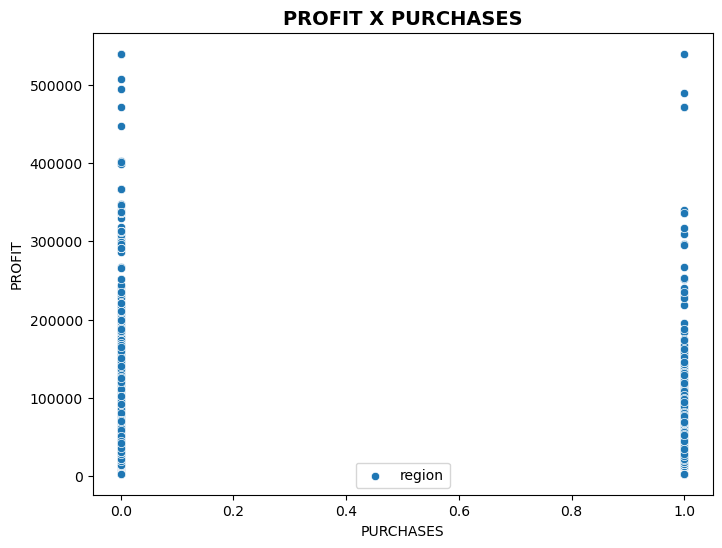

In [66]:
plt.subplots(figsize=(8, 6))
plt.title('PROFIT X PURCHASES',fontsize=14, fontweight='bold')
sns.scatterplot(data=data_new, y='annual_premium', x='response', label='region')
#sns.scatterplot(data=data_new, y='annual_premium', x='age', label='age')
plt.ylabel("PROFIT")
plt.xlabel("PURCHASES")

## <div style="color:white;display:fill;border-radius:5px;background-color:#153656;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Analise Multivariada</p></div>

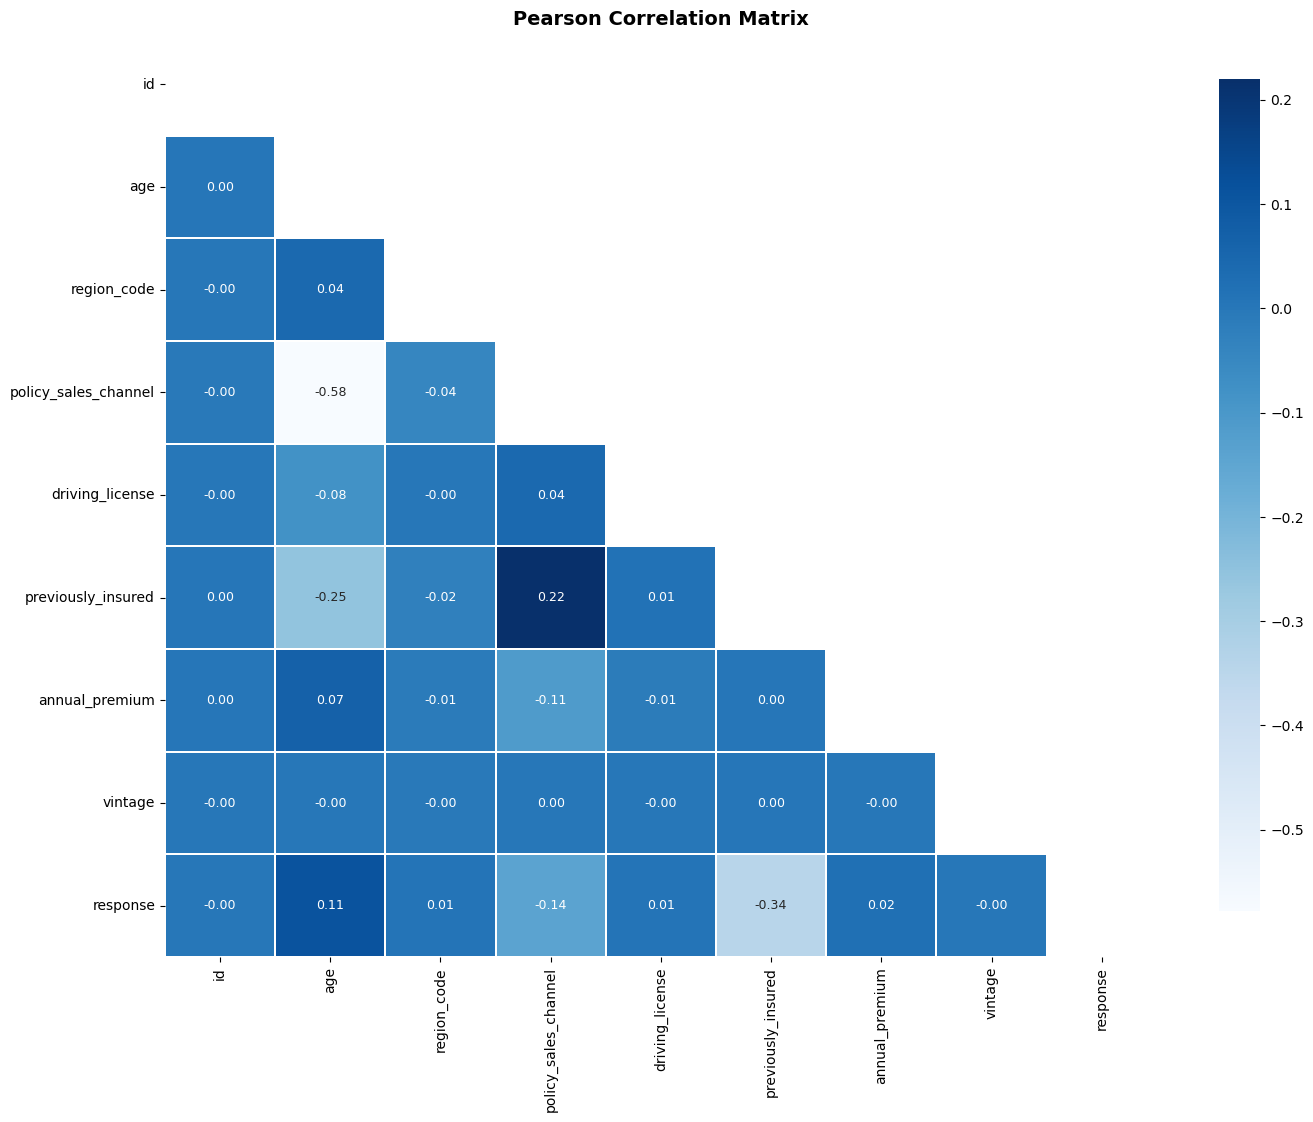

In [68]:
mask = np.zeros_like(data_new.corr(), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))

plt.title('Pearson Correlation Matrix',fontsize=14, fontweight='bold')

sns.heatmap(data_new.corr(method='pearson'), linewidths=0.25,fmt=".2f", cmap="Blues", linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});